### <p style='color:green;'><i>Autores</i></p>
<p> Arthur R. B. P. Barata </p>
<p style='margin:0;' > Sara Selis N. Soares </p>

In [1]:
import matplotlib.pyplot  as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

### Dateset carregado

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Exemplos de imagens: 


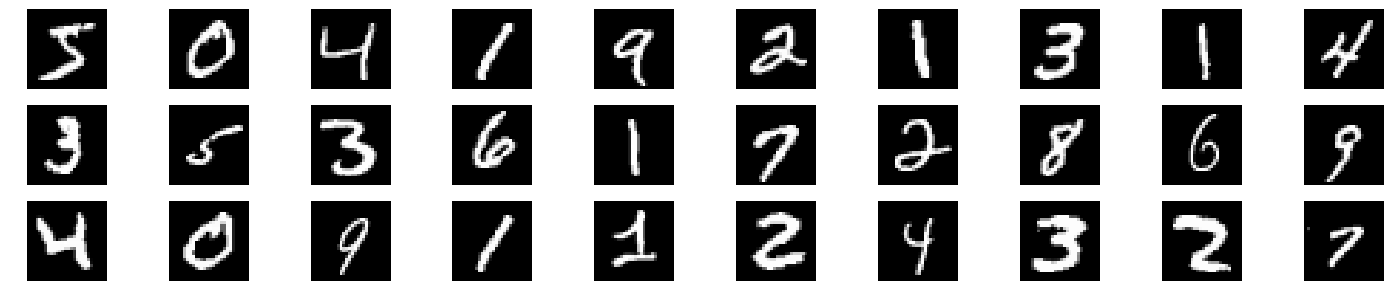

In [3]:
fig, axs = plt.subplots(3,10, figsize=(25,5))
axs = axs.flatten()

for img, ax in zip(X_train[:30], axs):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

print('Exemplos de imagens: ')
plt.show()

### MLP

In [4]:
# aqui é feito o reshape porque a imagem é uma matriz e, como a mlp só aceita um array 
# como entrada, trasformamos a matriz em um array sem perder o conteúdo
X_train_mlp = X_train.reshape(60000, 28*28)
X_test_mlp = X_test.reshape(10000, 28*28)

X_train_mlp = X_train_mlp.astype('float32')
X_test_mlp = X_test_mlp.astype('float32')

# aqui normalizamos os dados para que os pesos da IA não explodam
X_train_mlp /= 255
X_test_mlp /= 255

# aqui fazemos o onehot pois usamos ategorical cross entropy como otimizador
# exigindo que o label esteja em onehot encoding
y_train_mlp = tf.keras.utils.to_categorical(y_train, 10)
y_test_mlp = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
#Na construçäo do modelo nós optamos pot utlizar 3 camadas Densas e 1 camada de Dropout que dropa 20% dos dados
# por época para evitar overfiting
def model(input_shape, output):
    # escolhemos a função de ativação elu por se tratar de uma função que não prejudica muitos neurônios
    model = Sequential()
    
    # colocamos mais neurônios na primeira camada já que existem mais características de baixo nível 
    # que características de alto nível, fazendo com que necessitem de mais neurônios nos primeiros layers
    model.add(Dense(units=200, activation=tf.nn.elu, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(units=100, activation=tf.nn.elu))
    
    model.add(Dense(output, activation='softmax'))
    
    #O otimizador escolhido foi o adam
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    
    return model

In [6]:
# Capturamos o histórico de treinamento para posteriores análises
model = model(X_train_mlp[0].shape, 10)
history_mlp = model.fit(X_train_mlp, y_train_mlp, epochs=10, batch_size=100, validation_data=(X_test_mlp, y_test_mlp))

W0714 00:14:12.002386 140174009022272 deprecation.py:506] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3136 - acc: 0.9069 - val_loss: 0.1610 - val_acc: 0.9516
Epoch 2/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1593 - acc: 0.9522 - val_loss: 0.1062 - val_acc: 0.9661
Epoch 3/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1191 - acc: 0.9636 - val_loss: 0.0979 - val_acc: 0.9682
Epoch 4/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0942 - acc: 0.9703 - val_loss: 0.0945 - val_acc: 0.9712
Epoch 5/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0814 - acc: 0.9729 - val_loss: 0.0766 - val_acc: 0.9763
Epoch 6/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0690 - acc: 0.9773 - val_loss: 0.0782 - val_acc: 0.9756
Epoch 7/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0595 - acc: 0.9810 - val_loss: 0.

In [7]:
#Validaçäo do modelo
score_mlp = model.evaluate(X_test_mlp, y_test_mlp, verbose=0)
print('Loss: %.4f' %score_mlp[0])
print('Acc: %.4f' %score_mlp[1])

Loss  0.06746865021447301
Acc 0.9792


### <p style='color:magenta;'> CNN </p>

In [8]:
# como a intenção do exercício é treinar uma cnn, tentamos fazer o mais símples posssível
def model(input_shape, output):
    model = Sequential()
    
    # esse é a camada de convolução, responsável por passa a imagens por filtros que detectam várias coisas
    model.add(Conv2D(filters=32, kernel_size=(2,2), activation=tf.nn.elu, input_shape=input_shape))
    
    # essa camada seleciona os filtros que mais se destacaram
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    # aqui transformamos a matriz resultante da convolução em um vetor para entrar na mlp
    model.add(Flatten())
    
    # usamos elu aqui tbm por ser uma ótima função de ativação
    model.add(Dense(units=32, activation=tf.nn.elu))
    
    model.add(Dense(output, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [9]:
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train_cnn = X_train_cnn.astype('float32')
X_test_cnn = X_test_cnn.astype('float32')

# aqui normalizamos os dados para que os pesos da IA não explodam
X_train_cnn /= 255
X_test_cnn /= 255

# aqui fazemos o onehot pois usamos ategorical cross entropy como otimizador
# exigindo que o label esteja em onehot encoding
y_train_cnn = tf.keras.utils.to_categorical(y_train, 10)
y_test_cnn = tf.keras.utils.to_categorical(y_test, 10)

In [10]:
model = model(X_train_cnn[0].shape, 10)
history_cnn = model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=100, validation_data=(X_test_cnn, y_test_cnn))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 260us/sample - loss: 0.3152 - acc: 0.9103 - val_loss: 0.1697 - val_acc: 0.9510
Epoch 2/10
60000/60000 [==============================] - 15s 255us/sample - loss: 0.1517 - acc: 0.9551 - val_loss: 0.1111 - val_acc: 0.9671
Epoch 3/10
60000/60000 [==============================] - 15s 244us/sample - loss: 0.1060 - acc: 0.9683 - val_loss: 0.0946 - val_acc: 0.9714
Epoch 4/10
60000/60000 [==============================] - 15s 250us/sample - loss: 0.0827 - acc: 0.9750 - val_loss: 0.0766 - val_acc: 0.9767
Epoch 5/10
60000/60000 [==============================] - 15s 250us/sample - loss: 0.0702 - acc: 0.9783 - val_loss: 0.0747 - val_acc: 0.9771
Epoch 6/10
60000/60000 [==============================] - 16s 265us/sample - loss: 0.0592 - acc: 0.9813 - val_loss: 0.0733 - val_acc: 0.9772
Epoch 7/10
60000/60000 [==============================] - 15s 247us/sample - loss: 0.0512 - acc: 0.9841 

In [11]:
#Validaçäo do modelo
score_cnn = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Loss ', score_cnn[0])
print('Acc', score_cnn[1])

Loss  0.0651201749054715
Acc 0.9814


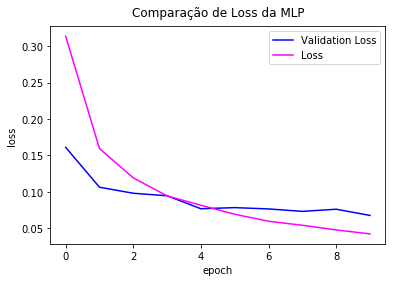

In [12]:
plt.plot(history_mlp.history['val_loss'], color='blue', label='Validation Loss')
plt.plot(history_mlp.history['loss'], color='magenta', label='Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Comparação de Loss da MLP', pad=10)
plt.legend()
plt.show()

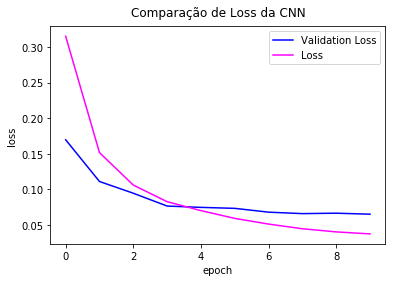

In [13]:
plt.plot(history_cnn.history['val_loss'], color='blue', label='Validation Loss')
plt.plot(history_cnn.history['loss'], color='magenta', label='Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Comparação de Loss da CNN', pad=10)
plt.legend()
plt.show()

### <p style='color:blue;'>Comparação</p>
é posssível perceber que mesmo em uma base de dados muito boa que é o caso da mnist, o desempenho da cnn ainda é melhor que o de uma mlp comum, porém o custo computacional é muito maior

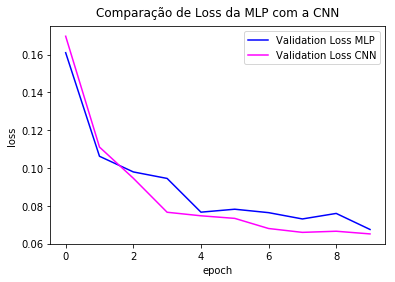

In [14]:
plt.plot(history_mlp.history['val_loss'], color='blue', label='Validation Loss MLP')
plt.plot(history_cnn.history['val_loss'], color='magenta', label='Validation Loss CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Comparação de Loss da MLP com a CNN', pad=10)
plt.legend()
plt.show()

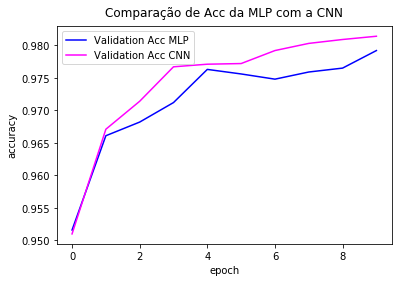

In [15]:
plt.plot(history_mlp.history['val_acc'], color='blue', label='Validation Acc MLP')
plt.plot(history_cnn.history['val_acc'], color='magenta', label='Validation Acc CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Comparação de Acc da MLP com a CNN', pad=10)
plt.legend()
plt.show()